# Least Squares Regression:

Assume we have some dataset $X \in \{ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) \}$ and we want to model the relationship
between some $x_i$ and it's corresponding value $y_i$. That is we want some function $y = f(x)$ that approximates the 
continuous value $y$ given the value of $x$.

Assume the relationship between $x$ and $y$ is linear. That is, $f(x) = \beta_1 x + \beta_0$ for some unknown $\beta_0$
and $\beta_1$ is an accurate approximator of the relationship between the $x$ and $y$ variables. 

More formally, notice that we are trying to optimize the following problem:

$$
\begin{aligned}
\min_{\beta_0, \beta_1} \sum_{i = 1}^{n} || f(x_i) - y ||_{2}^2
\end{aligned}
$$

Let's rewrite this in matrix form: 

$$
\begin{aligned}
f(x) & = \beta_1 x_i + \beta_0 \\[7pt]
     & = \beta_1 x_i + \beta_0 1 \\[7pt]
& \begin{bmatrix}
    x_1    & 1 \\
    x_2    & 1 \\
    \vdots & \vdots \\
    x_n    & 1 \\
\end{bmatrix}
\begin{bmatrix}
    \beta_1 \\
    \beta_0 \\
\end{bmatrix}
\end{aligned}
$$

Then we can see that our goal is to find a $\beta_0$ and $\beta_1$ that solves this following system of equations:

$$
\begin{aligned}
\begin{bmatrix}
    x_1    & 1 \\
    x_2    & 1 \\
    \vdots & \vdots \\
    x_n    & 1 \\
\end{bmatrix}
\begin{bmatrix}
    \beta_1 \\
    \beta_0 \\
\end{bmatrix} 
& = \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\ 
    y_n \\
\end{bmatrix}  \\[7pt]
Ax & = b \\
\end{aligned}
$$

## Interpretation 1: Optimization

Now the least squares problem has been represented as the classic linear algebra problem: $Ax = b$. Where we
want to minimize the squared L2-norm of the different $Ax - b$. Given data $X \in \mathbb{R}^{N x D}$. 
Then we define the matrix $A = [X : 1]$ The least squares problem is:

$$
\begin{aligned}
\min_{x} \sum_{i = 1}^{n} || Ax_{i} - b ||_{2}^2 \\
\min_{x} || Ax - b ||_{2}^2 \\ 
\min_{x} (Ax - b)^T (Ax - b) \\
\min_{x} ((Ax)^T - (b)^T) (Ax - b) \\
\min_{x} (Ax)^T(Ax) - (Ax)^T b - bAx + b^T b \\
\end{aligned}
$$

Let's pause here and notice that $(Ax)^T b$ and $bAx$ are both scalars, therefore we can 
simplify this and write:

$$
\begin{aligned}
\min_{x} (Ax)^T(Ax) - (Ax)^T b - bAx + b^T b \\
\min_{x} (Ax)^T(Ax) - 2b^T(Ax) + b^T b \\
\min_{x} x^TA^TAx - 2b^TAx + b^T b \\
\end{aligned}
$$

Then take the derivative w.r.t. the unknown x and solve for 0. 

$$
\begin{aligned}
\min_{x} x^TA^TAx - 2b^TAx + b^T b \\
\frac{\partial}{\partial x} x^TA^TAx - 2b^TAx + b^T b = 0\\
\end{aligned}
$$

Becuase $A^TA$ is symmetric then:

$$
\begin{aligned}
\frac{\partial}{\partial x} x^TA^TAx - 2b^TAx + b^T b = 0 \\
2A^TAx - 2A^Tb = 0 \\
A^TAx = A^Tb \\
x = (A^T A)^{-1} A^T b \\
\end{aligned}
$$


## Interpretation 2: Projections

Consider the classic problem $Ax = b$, we have already shown how least squares can 
be interpreted this way. Now consider our dataset, the reason why we aren't able 
to directly solve directly for x (for example, using RREF) is because $b$ is not in the column 
space our dataset. If it were we would be able to directly solve for the $x$ that gives
us the exact $b$ with $0$ error. So the least squares is essentially finding the best
$\hat{x}$ that gives us the lowest error. Another way to think about this is that we are
finding the $\hat{x}$ that solves the equation $A\hat{x} = \hat{b}$ where $\hat{b}$ is the 
closest projection of $b$ into the column space of our data. 

Since we can formalize this problem as a projection. 
Consider the projection of $b$ into the column space of our data matrix $A$. We define the
projection matrix of $A$ to be $P$ where $P = A(A^T A)^{-1}A^T$. Then the projection of $b$ 
into the column space of $A$ is $Pb = A(A^T A)^{-1}A^Tb$ which gives us the closest projection
of $b$ onto our data matrix $A$. Such that if we want to solve for the optimal $\hat{x}$, we can
directly solve for $\hat{x}$ as $\hat{b}$ is in our column space. Doing this we get:

$$
\begin{aligned}
A\hat{x} & = A(A^T A)^{-1}A^Tb \\
 \hat{x} & = (A^T A)^{-1}A^Tb \\
\end{aligned}
$$

Which is the exact same as the soluiton we got when optimizing using derivatives. 






In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class LinearRegression:
    def __init__(self):
        self.A     = None
        self.y     = None
        self.x_hat = None

    def predict(self, x):
        if self.A is None:
            print("Fit the model first.")
        else:
            x = np.concatenate([x, np.ones((x.shape[0], 1))], axis = 1)
            
            return x.dot(self.x_hat)

    def loss(self, X, y):
        return (1.0 / self.m) * np.sum((self.predict(X) - y) ** 2)

    def fit(self, X, y):
        self.m, self.n = X.shape
        
        self.A = np.concatenate([X, np.ones((self.m, 1))], axis = 1)
        self.y = y

        self.x_hat = np.linalg.pinv(self.A.T.dot(self.A)).dot(self.A.T).dot(self.y)
        

In [3]:
n = 100

artificial_weights = np.array([[-1]])
artificial_bias = np.array([[3]])

X = np.random.uniform(-2, 2, (n, 1))
noise = np.random.uniform(-1, 1, (n, 1))

y = X.dot(artificial_weights) + artificial_bias + (noise / 5.0)

model = LinearRegression()
model.fit(X, y)

weight = model.x_hat[0]
bias   = model.x_hat[1]

print("weight0: {} | bias: {}".format(weight, bias))
print("loss: {}".format(model.loss(X, y)))

weight0: [-0.99858764] | bias: [3.00941337]
loss: 0.013516030402795346


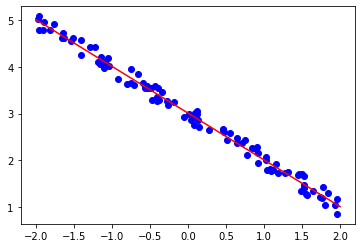

In [4]:
plt.scatter(X, y, color = "blue")

x = np.linspace(-2, 2, 2)

hyperplane = weight * x + bias

plt.plot(x, hyperplane, '-', color = "red")

plt.show()